<hr>



# Ex. 1

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

In [1]:
import numpy as np

In [2]:
def utility(x1,x2,alpha=0.5,beta=1):
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

<hr>

# Ex. 2
Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

In [3]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

In [4]:
import time

In [5]:
def print_table(x1_vec,x2_vec):
    
    # container
    text = ''

    # create top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
        text += f'{j:6d}' 
    text += '\n' # line shift
    
    # body
    for i,x1 in enumerate(x1_vec):
        if i > 0:
            text += '\n' # line shift if i>0, hence new line in the 'table' with new header value
        text += f'{i:3d} ' # add left header
        
        # add the resulting utility
        for j, x2 in enumerate(x2_vec):
            text += f'{utility(x1,x2):6.3f}'
        
        # print intermediate result and see how it works
        print(text,'\n _______________________________________ \n')
        
        # the .sleep() will delay the print so you can follow what happens down below for each iteration
        time.sleep(2.5)
        
    
    # print end result
    print('Result is \n', text)

print_table(x1_vec,x2_vec)

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569 
 _______________________________________ 

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832 
 _______________________________________ 

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641 
 _______________________________________ 

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768 
 _______________________________________ 

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100 
 _______________________________________ 

Result 
         0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.

<hr>

# Ex. 3
Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [6]:
# Import packages
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

# What is a meshgrid?
# From documentation:
    # "Returns X1, X2,…, XNndarray"
    # "... matrix (‘ij’) indexing of output"
    
x1_grid, x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')

# Create grid of utility values 
utlity_grid = utility(x1_grid,x2_grid)

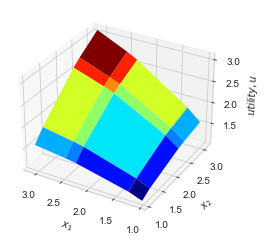

In [7]:
# Initialize canvas
# From documentation: .figure() us a unique identifier for the figure
fig = plt.figure()

# Add the subplot
# From documentation subplot(nrows, ncols, index, **kwargs)
ax = fig.add_subplot(1,1,1,projection='3d')

# Choose the desired .plot method
ax.plot_surface(x1_grid, x2_grid, utlity_grid, cmap=cm.jet)

# Customize any way you want, we just want the labels for now
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$utility,u$')

# Invert x-axis
ax.invert_xaxis();

<hr>

# Ex. 4

Consider the following minimization problem:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Solve this problem and illustrate your results.

Loop solution:    Minimum function value is -0.88366802 at x = -1.51515152
SciPy.optimize:   Minimum function value is -0.88786283 at x = -1.42756250


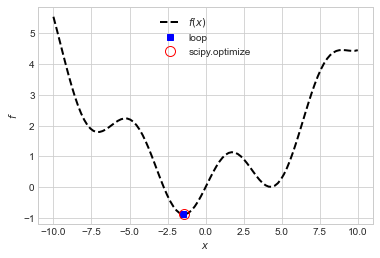

In [8]:
# Define the to be minimized function
def f(x):
    return np.sin(x)+0.05*x**2 

# Loop solution
# Initialize variables
N = 100
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

# Initial values
f_best = np.inf
x_best = np.nan 

# Start the loop - using enumerate we loop through the indexes and their correpsonding values
for i,x in enumerate(x_vec):
    
    # Evaluate function f(x) and assign value to vector and the temporary variable f_now
    f_now = f_vec[i] = f(x) 
    
    # Check if function value is smaller as we want to minimize
    if f_now < f_best:
        # Update values
        x_best = x
        f_best = f_now
        

# SciPy solution
from scipy import optimize

# Initial guess
x_guess = [0]

# Objective function:
objective_function = lambda x: f(x[0])

# SciPy syntax
opt = optimize.minimize(objective_function
                                 , x_guess
                                 , method='Nelder-Mead')

# Unpack results
x_best_scipy = opt.x[0]
f_best_scipy = opt.fun  

# Print
print(f'Loop solution:    Minimum function value is {f_best:.8f} at x = {x_best:.8f}')
print(f'SciPy.optimize:   Minimum function value is {f_best_scipy:.8f} at x = {x_best_scipy:.8f}')


# Plot
#Same as before
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Add .plot()'s to your subplot (ax)
ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',color='blue',label='loop')
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markersize=10,markerfacecolor='none',
        markeredgecolor='red',label='scipy.optimize')

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.grid(True)
ax.legend(loc='upper center');

<hr>

# Ex. 5

Consider the following $M$-good, $x=(x_1,x_2,\dots,x_M)$, **utility maximization problem** with exogenous income $I$, and price-vector $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{aligned}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E & = \sum_{i=1}^{M}p_{i}x_{i} \leq I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq 0
\end{aligned}
$$

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, $ \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)$, prices and income. First, with a loop, and then with a numerical optimizer.

You can use the following functions:

In [9]:
def utility_function(x,alpha):
    # ensure you understand what this function is doing

    u = 1
    for x_now,alpha_now in zip(x,alpha):
        u *= np.max(x_now,0)**alpha_now
    return u
    
def expenditures(x,p):
    # ensure you understand what this function is doing

    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E

def print_solution(x,alpha,I,p):
    # you can just use this function
    
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

In [10]:
# Initial values
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

## Loop

In [11]:
#Initialize variables
N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # Vector with values from 0 to 1 
x_max = I/p # maximum x so E = I

# Initial guesses
u_best = -np.inf
x_best = np.empty(5)

# Loop through all possible combinations
for x1 in fac:
    for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    # Create temproray vector of a certain combination of goods
                    x = np.array([x1,x2,x3,x4,x5])*x_max
                    
                    # Calculate expenditure given the amount of goods
                    E = expenditures(x,p)
                    
                    # First condition: expenditure cannot not exceed income
                    if E <= I:
                        #Calculate utility
                        u_now = utility_function(x,alpha)
                        
                        # Second condition: Update if utility is higher than before -> we want to max utility
                        if u_now > u_best:
                            # Update
                            x_best = x
                            u_best = u_now

# Use Christian's function to print results
print_solution(x_best, alpha, I, p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


## Itertools

In [12]:
import itertools as it

N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # vector betweein 0 and 1
x_max = I/p # maximum x so E = I

# Initial guess
x_best = np.empty(5)
u_best = -np.inf

# Loop through all possible combinations
for x in it.product(fac,fac,fac,fac,fac):
    # Create temproray vector of a certain combination of goods
    x *= x_max
    
    # The rest is equivalent to above
    E = expenditures(x,p)
    if E <= I:
        u_now = utility_function(x,alpha)
        if u_now > u_best:
            x_best = x
            u_best = u_now

# Use Christian's function to print results
print_solution(x_best, alpha, I, p)       

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


## Constrained solver

In [13]:
# Constraints dictionary for the problem. NB: lambda function so the constraint is iterable
constraints = ({'type': 'ineq'
                , 'fun': lambda x:  I-expenditures(x,p)})

# Bounds: cannot use more than I/p_now
bounds = [(0,I/p_now) for p_now in p]

# Initial guess
initial_guess = (I/p)/6 

# Objective
objective_function = lambda x: -utility_function(x,alpha)

# SciPy syntax
opt = optimize.minimize(objective_function
                        , initial_guess
                        , method='SLSQP'
                        , bounds=bounds
                        , constraints=constraints)

# Check that the solver has terminated correctly
print(opt.message) 

# Print results
print_solution(opt.x,alpha,I,p)

Optimization terminated successfully
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


## Unconstrained solver

In [14]:
# Initial guess
initial_guess = (I/p)/6

# Objective function
def unconstrained_objective(x,alpha,I,p):
    
    #Initialize penalty
    penalty = 0
    
    # Calculate expendetures given inputs
    E = expenditures(x,p)
    
    # If you spend more than you earn then x must be decreased i.e. you must consume less
    if E >= I:
        ratio = I/E
        x *= ratio # now p*x = I
        
        # Update penalty
        penalty = 1000*(E-I)**2
    
    u = utility_function(x,alpha)
    return -u + penalty 
    # note: 
    #  "-u" because we are minimizing
    #  ---------> "+ penalty" because the minimizer will then avoid the E > I

# SciPy syntax for unconstrained solver
opt = optimize.minimize(unconstrained_objective
                        , initial_guess
                        , method='Nelder-Mead'
                        , args=(alpha,I,p)
                        , options={'maxiter':5000}
                        , tol=1e-10)

print(opt.message)

print_solution(opt.x, alpha, I, p)   

Optimization terminated successfully.
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]
